In [1]:
%pylab inline
import numpy as np
import cancelv3 as cancel

def create_drive(zdata, dt2, tf, freqs):
    fbottom2 = np.fft.fft(zdata)
    freq2 = np.fft.fftfreq(len(zdata),dt2)
    freq2[freq2 > freqs[np.argmax(freqs)]] = freqs[np.argmax(freqs)]
    freq2[freq2 < freqs[np.argmin(freqs)]] = freqs[np.argmin(freqs)]
    driver = np.fft.ifft(tf*fbottom2)
    return driver

Populating the interactive namespace from numpy and matplotlib


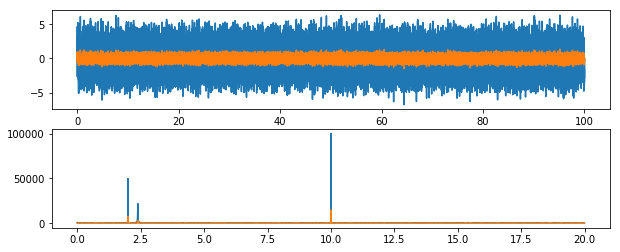

In [150]:
step = 0.001
f = 2*2*pi
f2 = 15
f3 = 10*2*pi
time = 100
t = arange(0,time,step)
wave = sin(f*t)+0.5*sin(f2*t)+2*sin(f3*t)
mea = 0
std = 1 
num_samples = len(t)
samples = numpy.random.normal(mea, std, size=num_samples)
samples2 = 0.005*numpy.random.normal(mea, std, size=num_samples)

wave_tip = wave + samples
wave_geo = 0.15*wave + 0.25*samples + samples2

sp_tip = fft.fft(wave_tip)
sp_geo = fft.fft(wave_geo)
freqs = fft.fftfreq(len(sp_tip),step)
fig,ax = subplots(2,1,figsize = [10,4])
ax[0].plot(t,wave_tip)
ax[0].plot(t,wave_geo)
ax[1].plot(freqs[0:2000],abs(sp_tip[0:2000]))
ax[1].plot(freqs[0:2000],abs(sp_geo[0:2000]))

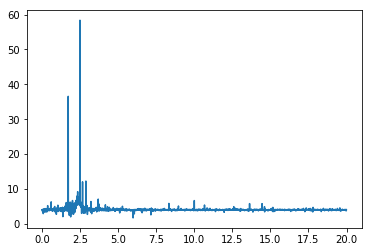

In [151]:
transf = abs(sp_tip)/abs(sp_geo)
plot(freqs[0:2000],abs(transf[0:2000]))

In [154]:
wave_tip_meas = wave + numpy.random.normal(mea, std, size=num_samples)
wave_geo_meas = 0.15*(wave_tip_meas)
sp_geo_meas = fft.fft(wave_geo_meas)

cur = exp(-(wave_tip_meas)*(-.21))

z_noise= create_drive(wave_geo_meas,1/10000,transf,freqs)
cur_noise = exp(-(z_noise)*(-.21))

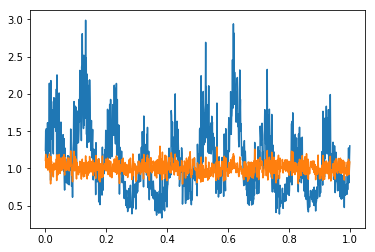

In [156]:
plot(t[:1000],cur[0:1000],label='Measured Data')
plot(t[:1000],cur[0:1000]/cur_noise[0:1000],label='Processed Data')
# plot(t,wave_tip_meas)
# plot(t,z_noise)
# plot(t,wave_geo_meas)

#print(cur_noise)